In [190]:
from scipy.io import arff
import pandas as pd
data = arff.loadarff('Sapfile1.arff')
df = pd.DataFrame(data[0])
df.shape

(131, 22)

The data set consits of 131 tuples with 22 attributes

In [194]:
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


## Descriptive Statistics

In [195]:
import matplotlib.pyplot as plt
AttributeName='ge'
gdata=df.groupby([AttributeName,'atd']).count().reset_index()
gdata

,ge,atd,cst,tnp,twp,iap,esp,arr,ms,ls,...,fs,fq,mq,fo,mo,nf,sh,ss,me,tt
0,b'F',b'Average',19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1,b'F',b'Good',33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2,b'F',b'Poor',7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
3,b'M',b'Average',28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
4,b'M',b'Good',23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
5,b'M',b'Poor',21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21


From the above we can see that female performs better than the male

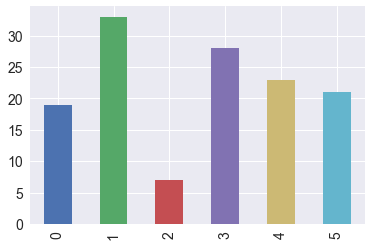

In [196]:
gdata['cst'].plot.bar()

# model building

All the data is converted to numerical values

In [179]:
df=df.apply(preprocessing.LabelEncoder().fit_transform)

From the data the dataframe is splitted into test and train data

There was no issue with the data.

In [180]:
X = df.values[:, 0:21]
Y = df.values[:,21]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=27)

## Naive Bayes Classifier

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)*100

33.33333333333333

Naive Bayes accuracy is 33%

In [182]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[4 4 1]
 [7 4 3]
 [2 1 1]]


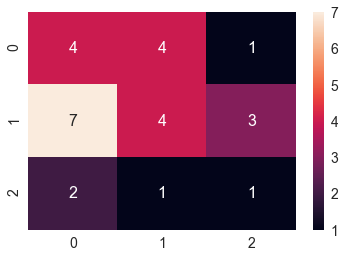

In [183]:
import seaborn as sn
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

The Confusion matrix is build

## Decision Tree 

In [184]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [185]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [186]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [187]:
y_pred = clf_gini.predict(X_test)

In [188]:
accuracy_score(y_test,y_pred)*100

50.0

The Decision tree accuracy is 50%

In [197]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[8 7 2]
 [4 9 0]
 [3 4 3]]


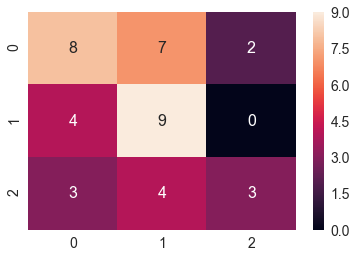

In [198]:
import seaborn as sn
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

The above is the confusion matrix of the decision tree